# Task 2: Sentiment and Thematic Analysis

In [1]:
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

## Sentiment Analysis

### importing datasets

In [3]:
# import the module
# In this task, we will load the cleaned the dataset for further analysis.
# First, we will load the module for data loading
from src.data_loader import DataLoader
import src.data_loader
reload(src.data_loader)

<module 'src.data_loader' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\data_loader.py'>

In [4]:
data_path='../data/processed/'
# Load the dataset
data_loader = DataLoader(data_path)
data = data_loader.load_data('combined_preprocessed.csv')

In [5]:
### Display the first few rows of the dataset
print("First few rows of the dataset:")
data

First few rows of the dataset:


,review_text,rating,date,bank_name,source
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play
3,BoA system is confartable,5,2025-06-01,BOA,Google Play
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play
...,...,...,...,...,...
1425,App That makes Difference!,5,2025-01-14,Dashen,Google Play
1426,"Waw Great and innovated,user friendly, always ...",5,2025-01-13,Dashen,Google Play
1427,It's Best waww 🙏,5,2025-01-13,Dashen,Google Play
1428,Always one step ahead,5,2025-01-13,Dashen,Google Play


### preprocessing for sentiment analysis

In [6]:
# import the module
from src.sentiment_analysis.preprocessing import Preprocessor
import src.sentiment_analysis.preprocessing
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.preprocessing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C

<module 'src.sentiment_analysis.preprocessing' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\preprocessing.py'>

In [7]:
# preprocess the data
preprocessor = Preprocessor()
data = preprocessor.preprocess_dataframe(data,'review_text')

In [8]:
data.head()

,review_text,rating,date,bank_name,source,processed_review
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play,hello facing problem boa mobile app every time...
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play,worest app loading
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play,app interest android phone please update
3,BoA system is confartable,5,2025-06-01,BOA,Google Play,boa system confartable
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play,nice abyssinia bank choice


### performing sentiment analysis

In [9]:
# load the sentiment analysis model
from src.sentiment_analysis.sentiment_analysis import SentimentAnalyzer
import src.sentiment_analysis.sentiment_analysis
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.sentiment_analysis)

d:\Research & Project\10academy\week 2\challenge\CX-analytics-for-fintech-apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'src.sentiment_analysis.sentiment_analysis' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\sentiment_analysis.py'>

In [10]:
# initialize the sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()
# Run sentiment analysis
results = sentiment_analyzer.analyze(data["processed_review"].tolist())


Device set to use cpu


In [11]:
# convert the sentiment scores to signed scores
def convert_to_signed_score(result):
    return result['score'] if result['label'] == 'POSITIVE' else -result['score']

In [12]:
# Add the results to the dataframe
data['sentiment'] = [r["label"] for r in results]
data['sentiment_score'] = [convert_to_signed_score(r) for r in results]

In [13]:
data.head()

,review_text,rating,date,bank_name,source,processed_review,sentiment,sentiment_score
0,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,BOA,Google Play,hello facing problem boa mobile app every time...,NEGATIVE,-0.998130
1,this is worest app 24/7 loading,1,2025-06-01,BOA,Google Play,worest app loading,NEGATIVE,-0.991218
2,This App is not interest for Android phone Ple...,1,2025-06-01,BOA,Google Play,app interest android phone please update,POSITIVE,0.808064
3,BoA system is confartable,5,2025-06-01,BOA,Google Play,boa system confartable,NEGATIVE,-0.998823
4,very nice Abyssinia bank is choice all,5,2025-05-31,BOA,Google Play,nice abyssinia bank choice,POSITIVE,0.999412


### Aggregate by bank and rating

In [14]:
# Ensure correct data types
data['rating'] = data['rating'].astype(int)

# Group by bank and rating, and calculate the average sentiment score
agg_data = data.groupby(['bank_name', 'rating'])['sentiment_score'].mean().reset_index()
agg_data = agg_data.rename(columns={'sentiment_score': 'mean_sentiment_score'})

# print the aggregated data
print("Aggregated data by bank and rating:")
print(agg_data)

Aggregated data by bank and rating:
   bank_name  rating  mean_sentiment_score
0        BOA       1             -0.648365
1        BOA       2             -0.623546
2        BOA       3             -0.235086
3        BOA       4              0.238008
4        BOA       5              0.572831
5        CBE       1             -0.579489
6        CBE       2             -0.695084
7        CBE       3             -0.505532
8        CBE       4              0.134200
9        CBE       5              0.722065
10    Dashen       1             -0.337573
11    Dashen       2             -0.478598
12    Dashen       3             -0.350008
13    Dashen       4              0.165530
14    Dashen       5              0.753900


### visualize the trends

In [49]:
# import module for visualization
from src.sentiment_analysis.visualization import SentimentVisualizer
import src.sentiment_analysis.visualization
# Reload the module to ensure we have the latest version
reload(src.sentiment_analysis.visualization)

<module 'src.sentiment_analysis.visualization' from 'D:\\Research & Project\\10academy\\week 2\\challenge\\CX-analytics-for-fintech-apps\\src\\sentiment_analysis\\visualization.py'>

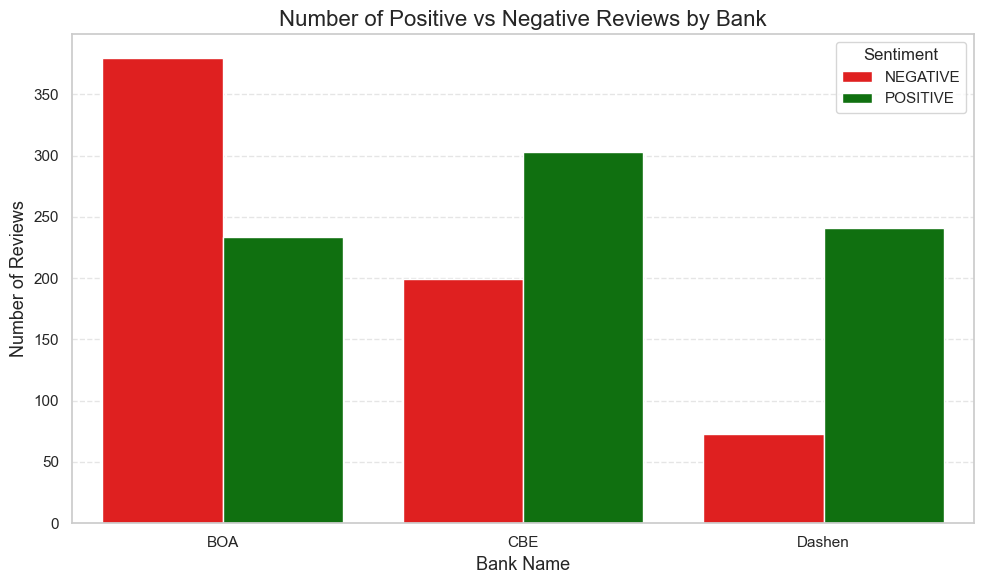

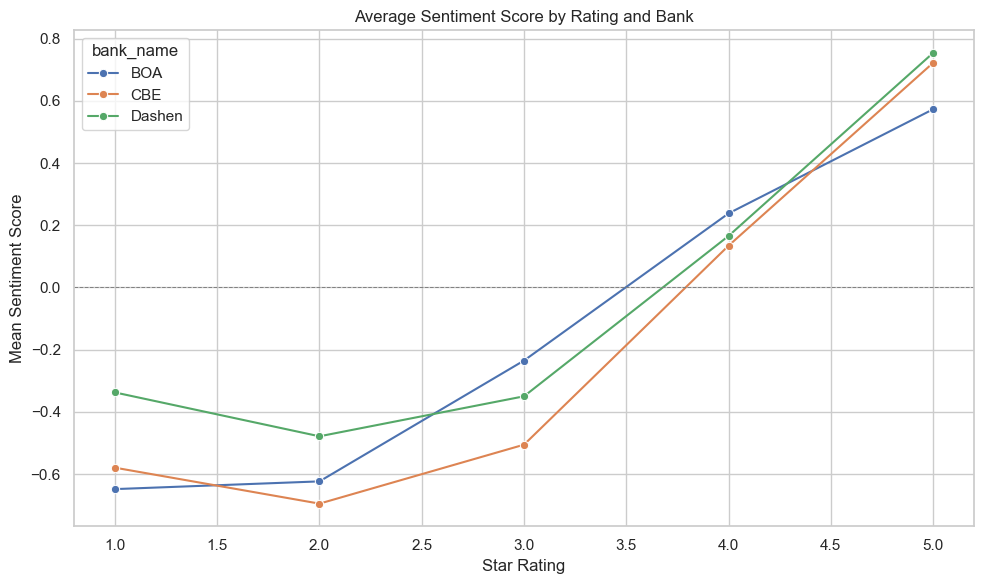

In [50]:
# initialize the visualizer
visualizer = SentimentVisualizer()

visualizer.plot_sentiment_distribution(data)


# Visualize the sentiment scores
visualizer.plot_mean_sentiment_trends(agg_data)